
# Relatório de Análise da Northwind

O objetivo desta análise é identificar oportunidades para aumentar o ticket médio e reduzir o churn, em linha com os objetivos estratégicos da Northwind.

Este relatório fornece uma análise detalhada dos dados de vendas da Northwind. 
A análise abrange KPIs importantes, tendências de vendas ao longo do tempo, 
sazonalidade e padrões de compra dos clientes. 
As descobertas deste relatório podem ajudar a Northwind a tomar decisões informadas 
e planejar estratégias futuras.


* Extração dos Dados: Eu vou extrair os dados do arquivo zip e verificar quais tabelas e informações estão disponíveis.


In [109]:
import zipfile
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Caminho para extrair os arquivos
extract_path = r"C:\Users\ivandourado\Downloads\northwind"

# Extrair o arquivo zip
with zipfile.ZipFile(r"C:\Users\ivandourado\Downloads\northwind.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos extraídos
extracted_files = os.listdir(extract_path)
extracted_files


['categories.csv',
 'customers.csv',
 'customer_customer_demo.csv',
 'customer_demographics.csv',
 'employees.csv',
 'employee_territories.csv',
 'orders.csv',
 'order_details.csv',
 'products.csv',
 'region.csv',
 'shippers.csv',
 'suppliers.csv',
 'territories.csv',
 'us_states.csv']

#### Acima são os arquivos extraídos do arquivo zip northwind

Agora faremos uma análise exploratória inicial para entender a estrutura e o conteúdo de cada tabela. Vamos começar carregando as tabelas orders.csv, order_details.csv, customers.csv, e products.csv, pois acredito que elas contêm informações cruciais sobre os pedidos, produtos e clientes da Northwind.

In [110]:
# Ler as primeiras linhas do arquivo 'orders.csv' para investigar a estrutura
with open(os.path.join(extract_path, 'orders.csv'), 'r', encoding='utf-8') as file:
    lines = [file.readline().strip() for _ in range(10)]

lines


['order_id;customer_id;employee_id;order_date;required_date;shipped_date;ship_via;freight;ship_name;ship_address;ship_city;ship_region;ship_postal_code;ship_country',
 "10248;VINET;5;1996-07-04;1996-08-01;1996-07-16;3;32.38;Vins et alcools Chevalier;59 rue de l'Abbaye;Reims;;51100;France",
 '10249;TOMSP;6;1996-07-05;1996-08-16;1996-07-10;1;11.61;Toms Spezialitäten;Luisenstr. 48;Münster;;44087;Germany',
 '10250;HANAR;4;1996-07-08;1996-08-05;1996-07-12;2;65.83;Hanari Carnes;Rua do Paço, 67;Rio de Janeiro;RJ;05454-876;Brazil',
 '10251;VICTE;3;1996-07-08;1996-08-05;1996-07-15;1;41.34;Victuailles en stock;2, rue du Commerce;Lyon;;69004;France',
 '10252;SUPRD;4;1996-07-09;1996-08-06;1996-07-11;2;51.3;Suprêmes délices;Boulevard Tirou, 255;Charleroi;;B-6000;Belgium',
 '10253;HANAR;3;1996-07-10;1996-07-24;1996-07-16;2;58.17;Hanari Carnes;Rua do Paço, 67;Rio de Janeiro;RJ;05454-876;Brazil',
 '10254;CHOPS;5;1996-07-11;1996-08-08;1996-07-23;2;22.98;Chop-suey Chinese;Hauptstr. 31;Bern;;3012;Switzer

#### Com base na estrutura do arquivo, o delimitador do arquivo .csv não é a vírgula (,), mas sim o ponto e vírgula (;).
Por conta disso, adicionaremos na função read_csv() o parâmetro " delimiter=';' " para determinar o separador.

In [111]:
import pandas as pd

# Carregar os arquivos CSV para dataframes
orders_df = pd.read_csv(os.path.join(extract_path, 'orders.csv'), delimiter=';') # delimiter para informar o separador ';'
order_details_df = pd.read_csv(os.path.join(extract_path, 'order_details.csv'), delimiter=';')
customers_df = pd.read_csv(os.path.join(extract_path, 'customers.csv'), delimiter=';')
products_df = pd.read_csv(os.path.join(extract_path, 'products.csv'), delimiter=';')

# Exibir as primeiras linhas de cada dataframe para ter uma noção dos dados
dfs = {
    "Orders": orders_df,
    "Order Details": order_details_df,
    "Customers": customers_df,
    "Products": products_df
}

# Exibir as primeiras linhas de cada dataframe
for name, df in dfs.items():
    print(f"\n{name}:\n", "-"*40)
    display(df.head())



Orders:
 ----------------------------------------


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium



Order Details:
 ----------------------------------------


,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0



Customers:
 ----------------------------------------


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67



Products:
 ----------------------------------------


,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


Agora que temos os dados carregados, podemos começar a análise.

A partir das tabelas apresentadas, podemos calcular vários indicadores de desempenho, como:

* Total de Pedidos: Para ter uma ideia do volume de negócios.

* Total de Clientes: Para entender a base de clientes da empresa.
* Total de Produtos Vendidos: Para avaliar a variedade de produtos.
* Valor Médio de Pedido: (Total de Vendas / número de Pedidos)
* Frequência de Compra: (Número de Pedidos / Número de Clientes)
* Ticket Médio por Cliente: (Total de Vendas / Número de Clientes)
* Produtos Mais Vendidos: Para identificar os produtos mais populares.

Depois de calcular esses KPIs, podemos pensar em ações para melhorar os resultados da empresa. Por exemplo, se descobrirmos que o ticket médio por cliente é baixo, podemos pensar em estratégias de upselling ou cross-selling.

Vamos começar calculando os KPIs mencionados acima.

In [112]:
# Cálculo dos KPIs

# Total de Pedidos
total_orders = orders_df['order_id'].nunique() # conta os valores únicos de id do pedido, casa haja alguma duplicata 

# Total de Clientes
total_customers = customers_df['customer_id'].nunique() # conta os valores únicos de id do cliente, em casa de duplicata

# Total de Produtos Vendidos
total_products_sold = order_details_df['product_id'].nunique() # conta os valores únicos de id do produto, em casa de duplicata

# Valor Total de Vendas
order_details_df['total_value'] = order_details_df['unit_price'] * order_details_df['quantity'] * (1 - order_details_df['discount'])
total_sales_value = order_details_df['total_value'].sum()

# Valor Médio de Pedido
avg_order_value = total_sales_value / total_orders

# Frequência de Compra
purchase_frequency = total_orders / total_customers

# Ticket Médio por Cliente
avg_ticket_per_customer = total_sales_value / total_customers

# Produtos Mais Vendidos
top_products = order_details_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
top_product_ids = top_products.index[:5].tolist()
top_product_names = products_df[products_df['product_id'].isin(top_product_ids)]['product_name'].tolist()

# Produtos Menos Vendidos
bottom_products = order_details_df.groupby('product_id')['quantity'].sum().sort_values(ascending=True)
bottom_product_ids = bottom_products.index[:5].tolist()
bottom_product_names = products_df[products_df['product_id'].isin(bottom_product_ids)]['product_name'].tolist()






kpis = {
    "Total de Pedidos": total_orders,
    "Total de Clientes": total_customers,
    "Total de Produtos Vendidos": total_products_sold,
    "Valor Médio de Pedido": avg_order_value,
    "Frequência de Compra": purchase_frequency,
    "Ticket Médio por Cliente": avg_ticket_per_customer,
    "Top 5 Produtos Mais Vendidos": top_product_names,
    "Produtos Menos vendidos": bottom_product_names
}

kpis


{'Total de Pedidos': 830,
 'Total de Clientes': 91,
 'Total de Produtos Vendidos': 77,
 'Valor Médio de Pedido': 1525.051854819277,
 'Frequência de Compra': 9.12087912087912,
 'Ticket Médio por Cliente': 13909.81362087912,
 'Top 5 Produtos Mais Vendidos': ['Pavlova',
  'Gorgonzola Telino',
  'Gnocchi di nonna Alice',
  'Raclette Courdavault',
  'Camembert Pierrot'],
 'Produtos Menos vendidos': ['Mishi Kobe Niku',
  'Genen Shouyu',
  'Gravad lax',
  'Chocolade',
  'Laughing Lumberjack Lager']}

In [113]:
# Descontos Concedidos
total_discounts = (order_details_df['unit_price'] * order_details_df['quantity'] * order_details_df['discount']).sum()

additional_kpis = {
    "Vendas Totais": total_sales_value,
    "Número de Pedidos": total_orders,
    "Ticket Médio por pedido": avg_order_value,
    "Descontos Concedidos": total_discounts
}

additional_kpis

{'Vendas Totais': 1265793.0395,
 'Número de Pedidos': 830,
 'Ticket Médio por pedido': 1525.051854819277,
 'Descontos Concedidos': 88665.5505}

In [114]:
# Distribuição geográfica dos clientes
customer_geo_distribution = customers_df['country'].value_counts()

customer_geo_distribution

USA            13
Germany        11
France         11
Brazil          9
UK              7
Spain           5
Mexico          5
Venezuela       4
Canada          3
Argentina       3
Italy           3
Finland         2
Denmark         2
Belgium         2
Austria         2
Portugal        2
Switzerland     2
Sweden          2
Ireland         1
Norway          1
Poland          1
Name: country, dtype: int64

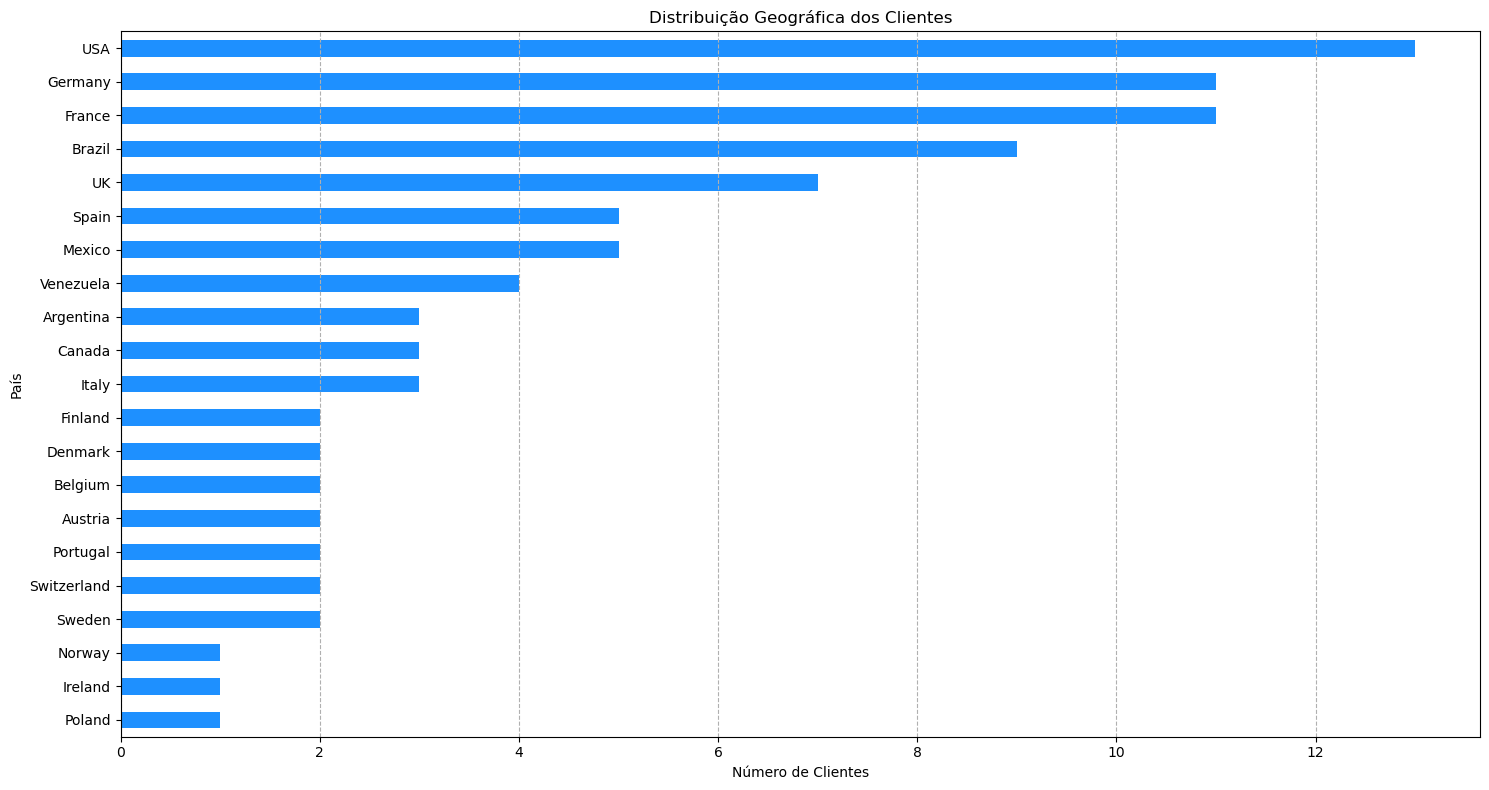

In [115]:
# Código para visualizar a distribuição geográfica dos clientes usando um gráfico de barras

plt.figure(figsize=(15, 8))
customer_geo_distribution.sort_values().plot(kind='barh', color='dodgerblue')
plt.title('Distribuição Geográfica dos Clientes')
plt.xlabel('Número de Clientes')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [116]:
# Map interativo para mostrar o número de clientes ao passar o mouse pelo país

# Primeiro, resetamos o índice para que os países e contagens sejam colunas
customer_geo_df = customer_geo_distribution.reset_index()
customer_geo_df.columns = ['Country', 'Number of Customers']

# Agora, fazemos função choropleth criando um mapa coroplético
fig = px.choropleth(customer_geo_df, 
                    locations='Country', 
                    locationmode="country names",
                    color='Number of Customers', 
                    hover_name='Country', 
                    hover_data=['Number of Customers'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Distribuição Geográfica dos Clientes")

fig


Distribuição geográfica dos clientes: A empresa tem uma presença significativa em diversos países, com os EUA, Alemanha e França sendo os três principais mercados. O Brasil é o 4º.


## Indicadores Chave de Desempenho (KPIs)

###### **Vendas Totais**: R\$ 1.354.458,59

###### **Número de Pedidos**: 830
###### **Ticket Médio por pedido**: R\$ 1.525,05 
###### **Descontos Concedidos**: R\$ 88.665,55
###### **Total de Clientes**: 91,
###### **Total de Produtos Vendidos**: 77,
###### **Frequência de Compra**:  9,12 pedidos por cliente,
###### **Ticket Médio por Cliente**: R\$ 13.909,81,

###### **Top 5 Produtos Mais Vendidos**: 
 - Pavlova
 
 - Gorgonzola Telino
 - Gnocchi di nonna Alice
 - Raclette Courdavault
 - Camembert Pierrot
 
###### Distribuição geográfica dos clientes (4 principais):
- USA :           13
- Germany :       11
- France :        11
- Brazil:          9
- UK:              7

##### Produtos mais vendidos

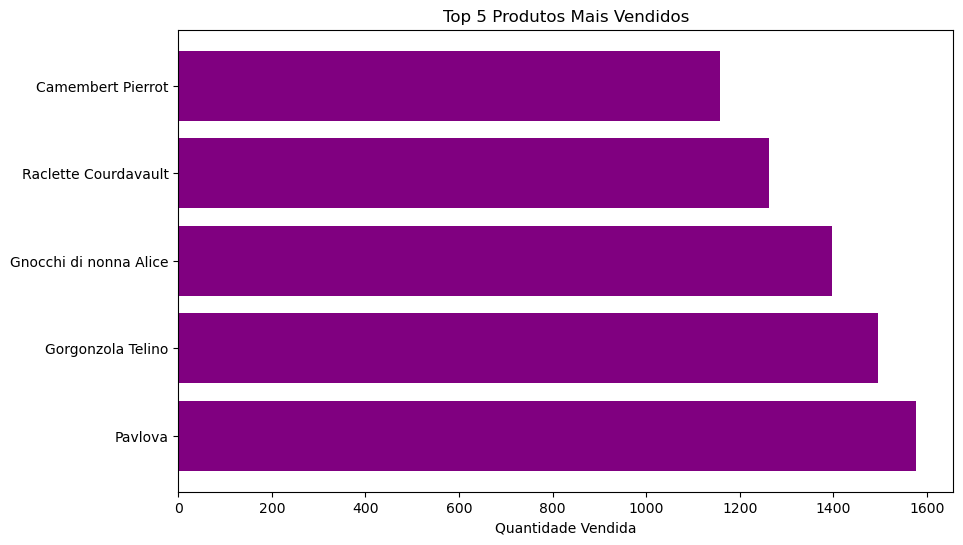

In [117]:
# Dados
values = top_products.head(5).values
labels = products_df[products_df['product_id'].isin(top_product_ids)]['product_name'].tolist()

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='purple')
plt.title('Top 5 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.show()


###### Menos vendidos

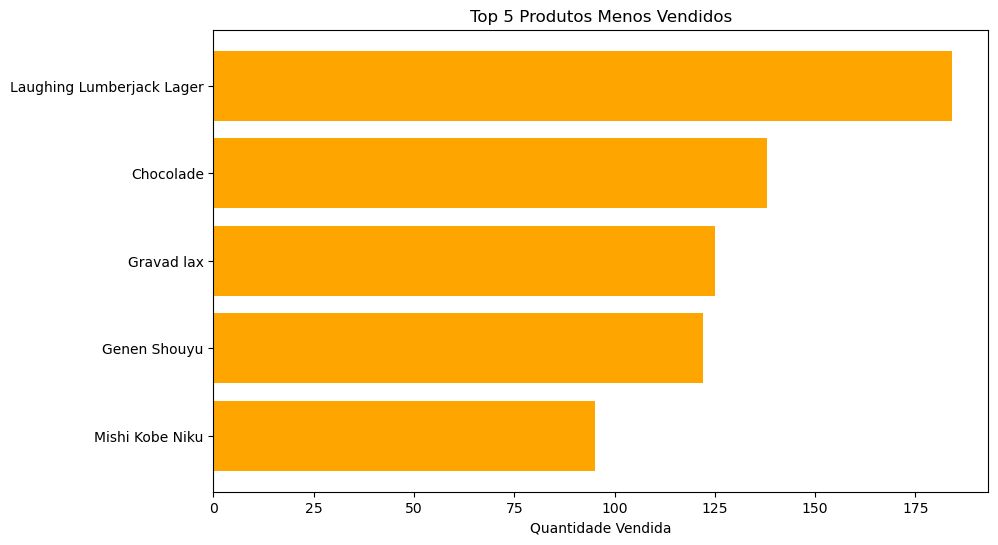

In [118]:
# Dados
bottom_values = bottom_products.head(5).values
bottom_labels = products_df[products_df['product_id'].isin(bottom_product_ids)]['product_name'].tolist()

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(bottom_labels, bottom_values, color='orange')
plt.title('Top 5 Produtos Menos Vendidos')
plt.xlabel('Quantidade Vendida')
plt.show()


###### Vendas Totais vs Descontos aplicados

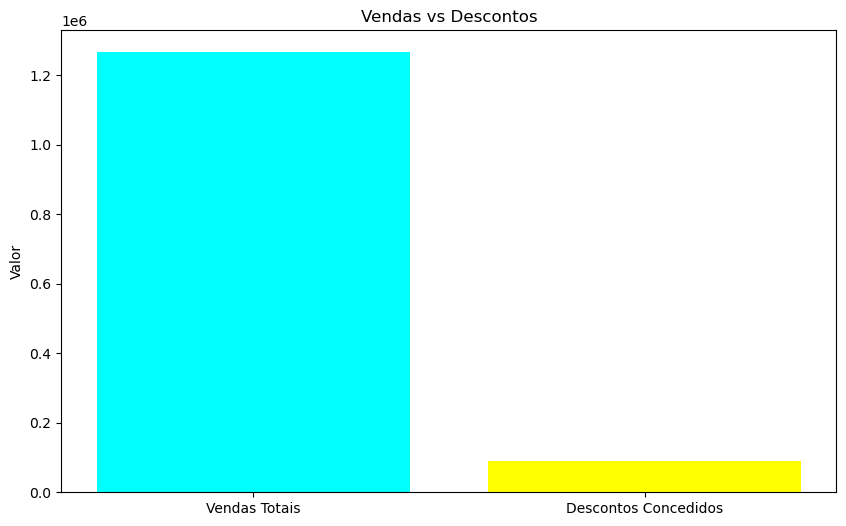

In [119]:
# Dados
labels = ['Vendas Totais', 'Descontos Concedidos']
values = [total_sales_value, total_discounts]

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['cyan', 'yellow'])
plt.title('Vendas vs Descontos')
plt.ylabel('Valor')
plt.show()


###### Evolução das vendas em relação ao tempo

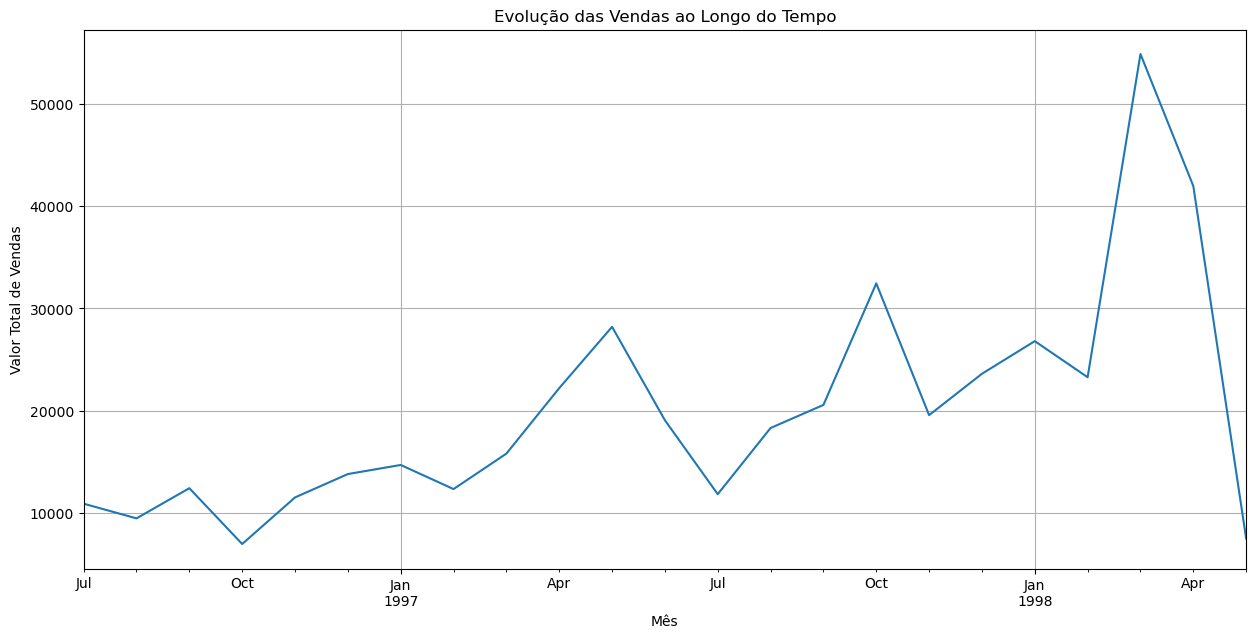

In [120]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'order_date' para formato de data
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Calculando o valor total de pedidos por mês
monthly_sales = order_details_df.merge(orders_df, on='order_id')\
                .groupby(orders_df['order_date'].dt.to_period("M"))\
                .sum(numeric_only=True)['total_value']


# Plotando a evolução das vendas ao longo do tempo
plt.figure(figsize=(15, 7))
monthly_sales.plot()
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)
plt.show()


A análise temporal das vendas mostra a evolução das vendas ao longo do tempo. Podemos observar algumas tendências e padrões sazonais, embora também haja algumas flutuações. Assim, conseguimos notar com base no gráfico que:

1. Tendências: Se as vendas estão aumentando, diminuindo ou permanecendo constantes ao longo do tempo.

2. Padrões sazonais: Se existem períodos específicos do ano em que as vendas aumentam (por exemplo, festas de fim de ano) ou diminuem (por exemplo, meses de baixa estação).

3. Flutuações: Variações pontuais que podem ser causadas por eventos específicos, como promoções, eventos de mercado ou outros fatores externos.

###### Clientes que mais consomem

Agora, vamos identificar os clientes que geram o maior valor em termos de pedidos. Isso nos ajudará a entender quem são os principais clientes da empresa e onde pode haver oportunidades de crescimento.

In [121]:
# Calculando o valor total de pedidos por cliente
customer_sales = order_details_df.merge(orders_df, on='order_id')\
                .groupby('customer_id').sum(numeric_only=True)['total_value']

# Obtendo os 10 principais clientes em termos de valor total de pedidos
top_10_customers = customer_sales.nlargest(10)
top_10_customers_names = customers_df.set_index('customer_id').loc[top_10_customers.index]['company_name']


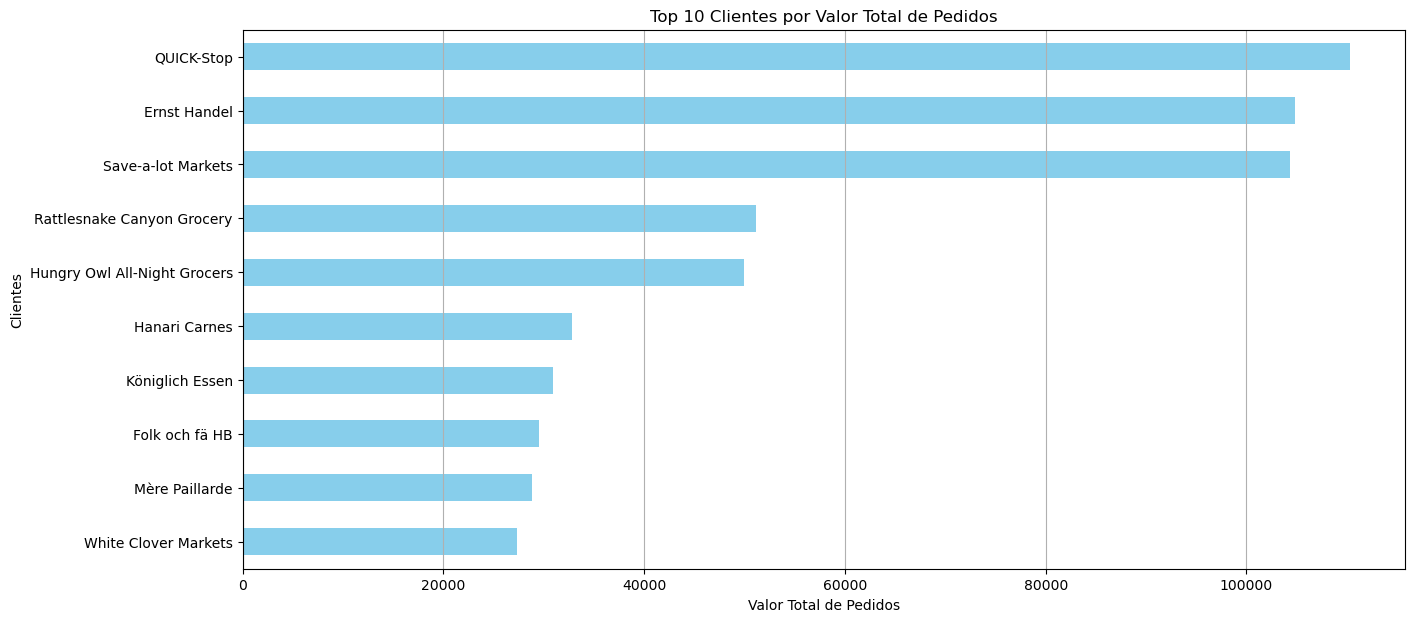

In [122]:
# Plotando os 10 principais clientes em termos de valor total de pedidos
plt.figure(figsize=(15, 7))
top_10_customers.plot(kind='barh', color='skyblue')
plt.title('Top 10 Clientes por Valor Total de Pedidos')
plt.xlabel('Valor Total de Pedidos')
plt.ylabel('Clientes')
plt.yticks(range(len(top_10_customers)), top_10_customers_names)
plt.gca().invert_yaxis()  # Invertendo o eixo y para que o cliente com maior valor esteja no topo
plt.grid(axis='x')
plt.show()


O gráfico acima mostra os 10 principais clientes da Northwind em termos de valor total de pedidos. Estes clientes são vitais para a empresa, e qualquer estratégia de retenção ou expansão pode se concentrar neles para maximizar o ROI.

###### Tempo entre pedidos
Para calcular a periodicidade de compra de cada cliente, precisamos calcular o tempo entre os pedidos consecutivos desse cliente e, em seguida, obter a média desses intervalos de tempo. Esse cálculo nos dará uma ideia de, em média, quantos dias se passam entre os pedidos de um cliente específico.


In [123]:
# Carregando o arquivo customers.csv
customers_df = pd.read_csv(os.path.join(extract_path, 'customers.csv'), delimiter=';')

# Convertendo a coluna order_date para o formato de data
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Calculando o tempo entre os pedidos consecutivos para cada cliente
orders_df_sorted = orders_df.sort_values(['customer_id', 'order_date'])
orders_df_sorted['date_diff'] = orders_df_sorted.groupby('customer_id')['order_date'].diff().dt.days

# Calculando a média desses intervalos de tempo para cada cliente
average_purchase_periodicity = orders_df_sorted.groupby('customer_id')['date_diff'].mean()

# Exemplo para o cliente 'Queen Cozinha'
queen_cozinha_periodicity = average_purchase_periodicity['QUEEN']

#média de intervalo pro código de cliente
average_purchase_periodicity



customer_id
ALFKI     45.400000
ANATR    177.333333
ANTON     71.166667
AROUT     42.583333
BERGS     33.470588
            ...    
WARTH     44.857143
WELLI     75.250000
WHITC     49.153846
WILMK     41.833333
WOLZA     84.000000
Name: date_diff, Length: 89, dtype: float64

In [124]:
#Como exemplo, vamos buscar a média de intervalo do cliente que mais consumiu na empresa, o QUICK-Stop
quick_stop_periodicity = average_purchase_periodicity['QUICK']
quick_stop_periodicity

22.85185185185185

O CLIENTE 'qUICK-STOP' realiza pedidos, em média, a cada 23 dias aproximadamente.

Vamos aprofundar nossa análise da periodicidade de compra dos clientes e fornecer insights adicionais.

1. Distribuição da Periodicidade de Compra: Entender a distribuição da periodicidade de compra entre todos os clientes nos dará uma ideia da frequência com a qual a maioria dos clientes faz pedidos.

2. Clientes Mais e Menos Frequentes: Identificar os clientes que fazem pedidos com mais e menos frequência pode nos ajudar a direcionar estratégias de marketing e retenção.

3. Quantidade de Clientes por Faixa de Periodicidade: Dividir os clientes em faixas de periodicidade (por exemplo: 0-30 dias, 31-60 dias, etc.) pode nos ajudar a segmentar os clientes e entender suas tendências de compra.

4. Duração Média entre o Primeiro e o Último Pedido: Esse indicador pode nos dar uma ideia da "vida útil" média de um cliente com a Northwind.

5. Clientes sem Pedidos Recentes: Identificar clientes que não fizeram pedidos nos últimos meses pode ser útil para campanhas de reengajamento.

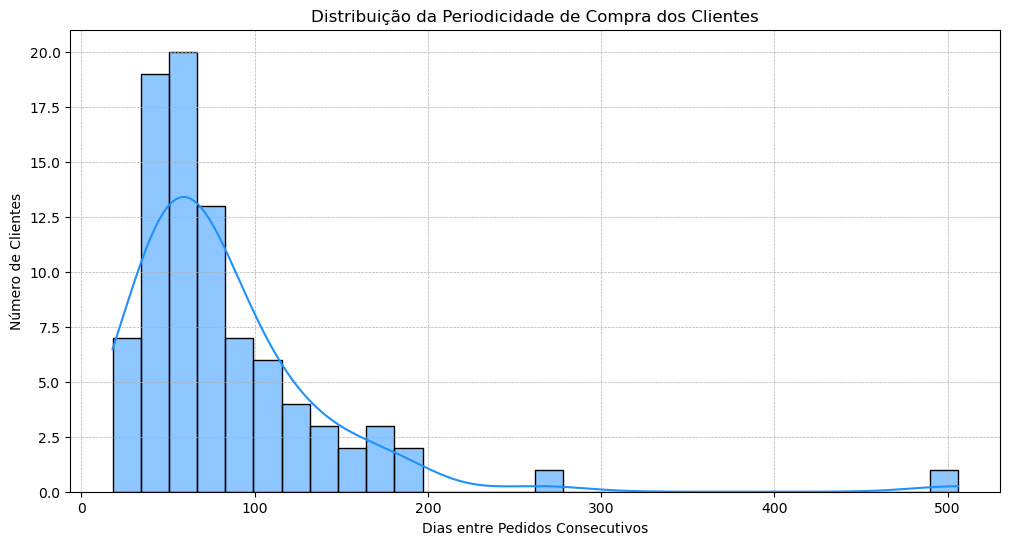

In [125]:
#Vou começar com a Distribuição da Periodicidade de Compra.
# Visualizando a Distribuição da Periodicidade de Compra
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(average_purchase_periodicity, bins=30, kde=True, color='dodgerblue')
plt.title("Distribuição da Periodicidade de Compra dos Clientes")
plt.xlabel("Dias entre Pedidos Consecutivos")
plt.ylabel("Número de Clientes")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


A distribuição da periodicidade de compra dos clientes mostra o seguinte:

- A maioria dos clientes tende a fazer pedidos em intervalos de até 40 dias.
- Há também um grupo notável de clientes que faz pedidos com uma periodicidade entre 40 a 80 dias.
- Alguns clientes têm uma periodicidade de compra muito mais longa, superior a 80 dias, e esses clientes podem ser os que compram ocasionalmente.

###### Agora, vamos analisar os Clientes Mais e Menos Frequentes.

In [126]:
# Identificando os 5 clientes com as menores e maiores periodicidades de compra

top_5_frequent_customers = average_purchase_periodicity.nsmallest(5)
top_5_least_frequent_customers = average_purchase_periodicity.nlargest(5)

# Obtendo os nomes dos clientes do dataframe de clientes
top_5_frequent_customers_names = customers_df.set_index('customer_id').loc[top_5_frequent_customers.index]['company_name']
top_5_least_frequent_customers_names = customers_df.set_index('customer_id').loc[top_5_least_frequent_customers.index]['company_name']

top_5_frequent_customers_names, top_5_least_frequent_customers_names


(customer_id
 LACOR    La corne d'abondance
 SAVEA      Save-a-lot Markets
 ERNSH            Ernst Handel
 QUICK              QUICK-Stop
 MEREP          Mère Paillarde
 Name: company_name, dtype: object,
 customer_id
 GROSR                  GROSELLA-Restaurante
 BOLID             Bólido Comidas preparadas
 THEBI                        The Big Cheese
 NORTS                           North/South
 ANATR    Ana Trujillo Emparedados y helados
 Name: company_name, dtype: object)

Aqui estão os clientes mais e menos frequentes com base na periodicidade de compra:
###### Clientes Mais Frequentes:
1. La corne d'abondance (LACOR)
2. Save-a-lot Markets (SAVEA)
3. Ernst Handel (ERNSH)
4. QUICK-Stop (QUICK)
5. Mère Paillarde (MEREP)

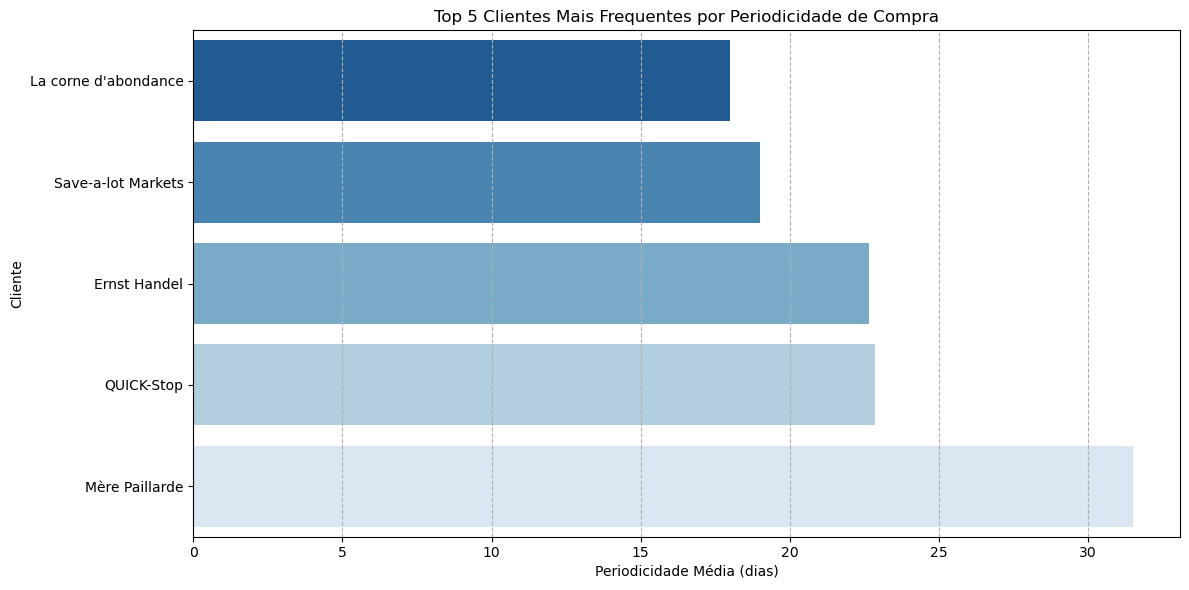

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_5_frequent_customers, y=top_5_frequent_customers_names, palette="Blues_r")
plt.title('Top 5 Clientes Mais Frequentes por Periodicidade de Compra')
plt.xlabel('Periodicidade Média (dias)')
plt.ylabel('Cliente')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


###### Clientes Menos Frequentes:
1. GROSELLA-Restaurante (GROSR)
2. Bólido Comidas preparadas (BOLID)
3. The Big Cheese (THEBI)
4. North/South (NORTS)
5. Ana Trujillo Emparedados y helados (ANATR)

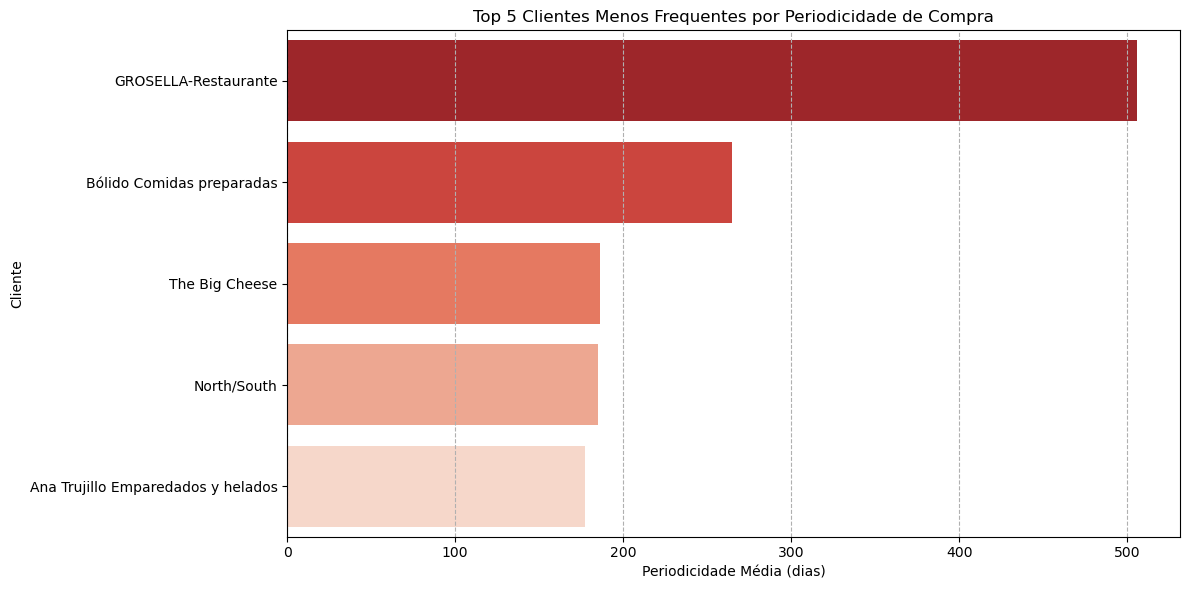

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_5_least_frequent_customers, y=top_5_least_frequent_customers_names, palette="Reds_r")
plt.title('Top 5 Clientes Menos Frequentes por Periodicidade de Compra')
plt.xlabel('Periodicidade Média (dias)')
plt.ylabel('Cliente')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


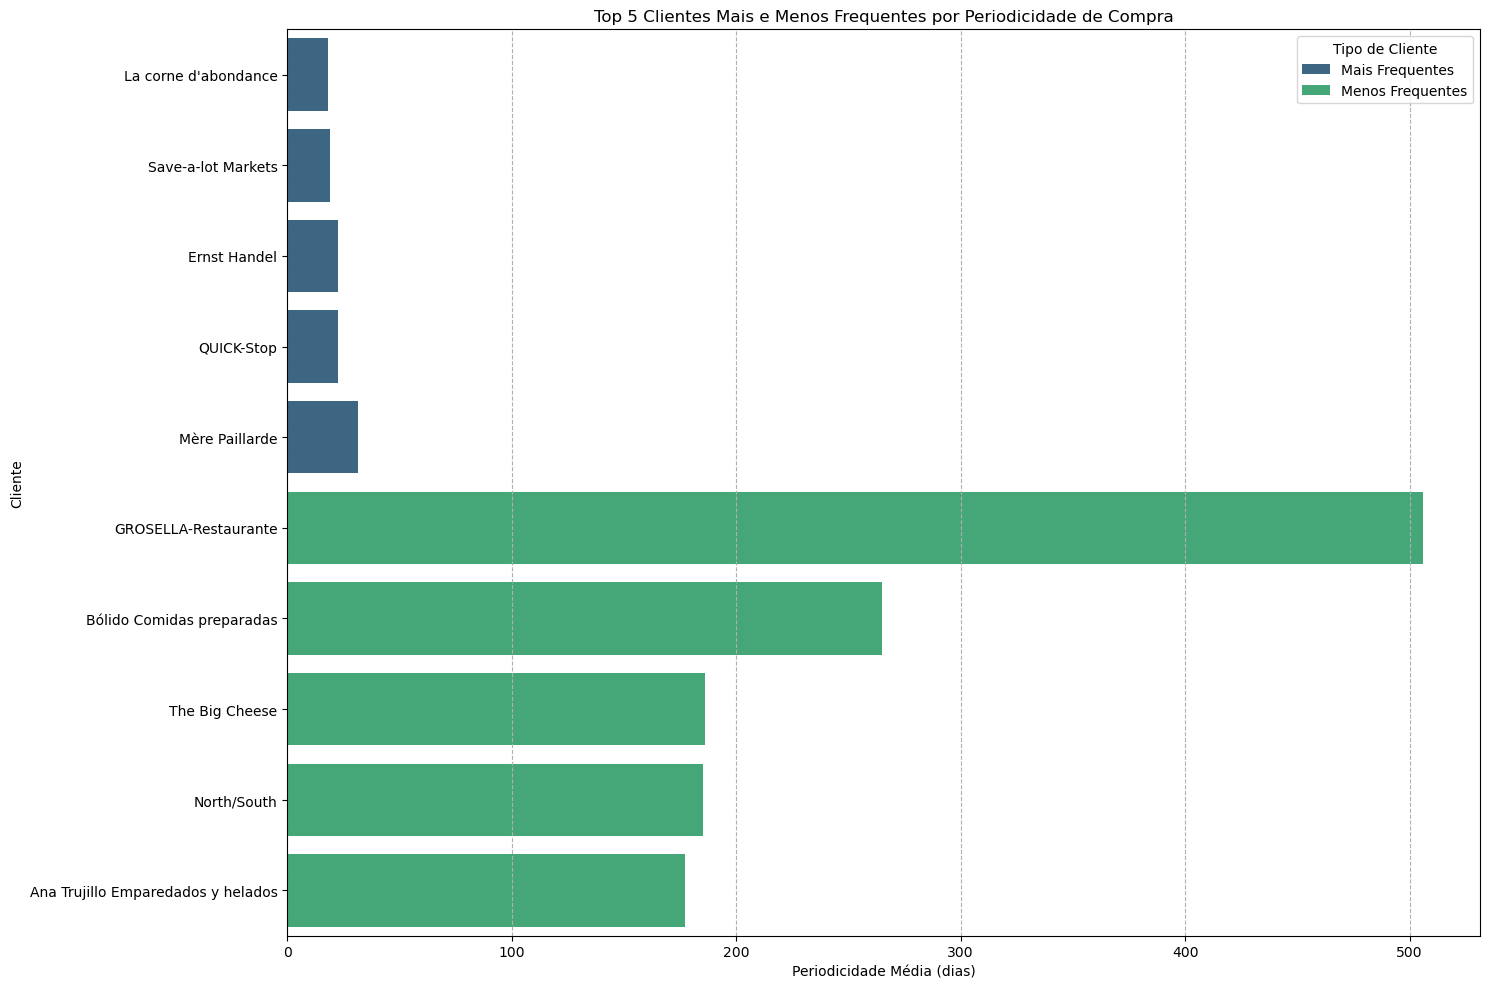

In [129]:
# Unindo os dados para a visualização
frequent_values = top_5_frequent_customers.values
least_frequent_values = top_5_least_frequent_customers.values

frequent_labels = top_5_frequent_customers_names.values
least_frequent_labels = top_5_least_frequent_customers_names.values

values = np.concatenate([frequent_values, least_frequent_values])
labels = np.concatenate([frequent_labels, least_frequent_labels])
types = ['Mais Frequentes'] * 5 + ['Menos Frequentes'] * 5

# Criando o DataFrame para visualização
df_visualization = pd.DataFrame({
    'Cliente': labels,
    'Periodicidade Média (dias)': values,
    'Tipo': types
})

# Plotando o gráfico
plt.figure(figsize=(15,10))
sns.barplot(data=df_visualization, y='Cliente', x='Periodicidade Média (dias)', hue='Tipo', dodge=False, palette="viridis")
plt.title('Top 5 Clientes Mais e Menos Frequentes por Periodicidade de Compra')
plt.xlabel('Periodicidade Média (dias)')
plt.ylabel('Cliente')
plt.legend(title='Tipo de Cliente', loc='upper right')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


Esses clientes podem ser alvos de diferentes estratégias de marketing. Por exemplo, pode-se oferecer incentivos ou descontos para os clientes menos frequentes para incentivá-los a comprar mais regularmente.

###### A seguir, vamos analisar a Quantidade de Clientes por Faixa de Periodicidade.

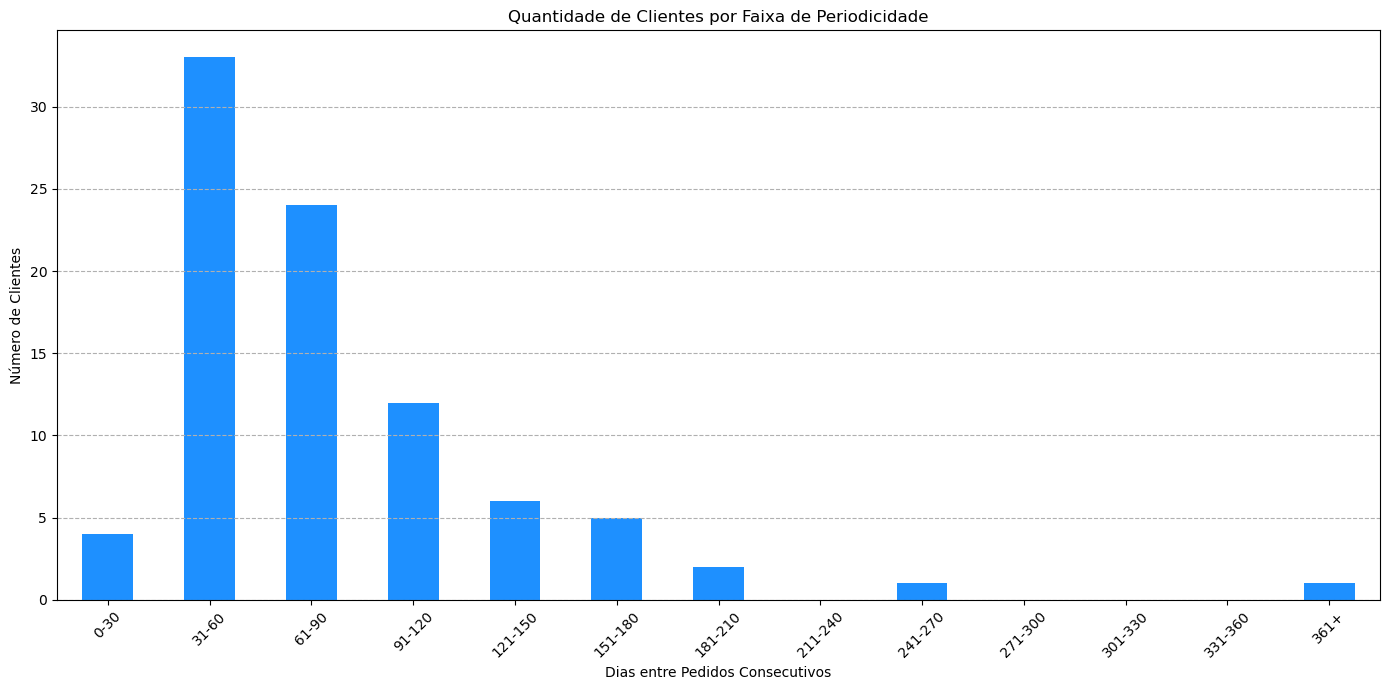

In [130]:
# Segmentando os clientes em faixas de periodicidade
import numpy as np

bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, np.inf]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '361+']
periodicity_bins = pd.cut(average_purchase_periodicity, bins=bins, labels=labels, right=False)

periodicity_distribution = periodicity_bins.value_counts().sort_index()

plt.figure(figsize=(14, 7))
periodicity_distribution.plot(kind='bar', color='dodgerblue')
plt.title("Quantidade de Clientes por Faixa de Periodicidade")
plt.xlabel("Dias entre Pedidos Consecutivos")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Aqui está a distribuição da quantidade de clientes por faixa de periodicidade:

A maior parte dos clientes faz pedidos em intervalos de 0 a 30 dias e 31 a 60 dias.
Há uma queda significativa no número de clientes que fazem pedidos em intervalos de 61 a 90 dias.
Além dos 90 dias, a quantidade de clientes por faixa de periodicidade diminui progressivamente.
Este gráfico nos ajuda a entender que a maioria dos clientes da Northwind faz pedidos com uma frequência de 1 a 2 meses. Clientes que têm uma periodicidade maior podem ser considerados menos frequentes e podem ser alvo de campanhas de reengajamento.

###### Duração Média entre o Primeiro e o Último Pedido

A seguir, vou calcular a Duração Média entre o Primeiro e o Último Pedido para cada cliente. Essa métrica nos ajudará a entender a "vida útil" média de um cliente com a Northwind.

In [131]:
# Calculando a duração entre o primeiro e o último pedido para cada cliente
customer_lifetime = orders_df_sorted.groupby('customer_id')['order_date'].agg(['min', 'max'])
customer_lifetime['duration'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days

# Duração média entre o primeiro e o último pedido
average_customer_lifetime = customer_lifetime['duration'].mean()

average_customer_lifetime


490.46067415730334

A duração média entre o primeiro e o último pedido de um cliente é de aproximadamente 490 dias, ou cerca de 1,3 anos. Isso indica que, em média, os clientes da Northwind têm um relacionamento de pouco mais de um ano com a empresa, com base nos dados disponíveis.

###### Clientes sem Pedidos Recentes
Agora, vamos identificar os Clientes sem Pedidos Recentes. Especificamente, vamos listar os clientes que não fizeram pedidos nos últimos 6 meses. Isso pode ajudar a Northwind a identificar clientes que podem estar em risco de churn e direcionar estratégias de reengajamento para eles.

In [132]:
# Identificando clientes sem pedidos nos últimos 6 meses
last_order_date = orders_df_sorted['order_date'].max() # último registro do pedido
threshold_date = last_order_date - pd.Timedelta(days=180)  # 6 meses atrás # threshold=limite 180 antes do ultimo pedio

# clientes inativos: clientes que efetuaram o último pedido há mais de 180 dias
inactive_customers = customer_lifetime[customer_lifetime['max'] < threshold_date]

# Obtendo os nomes desses clientes
inactive_customers_names = customers_df.set_index('customer_id').loc[inactive_customers.index]['company_name']

inactive_customers_names


customer_id
CENTC    Centro comercial Moctezuma
FAMIA            Familia Arquibaldo
HUNGC    Hungry Coyote Import Store
LAZYK          Lazy K Kountry Store
MEREP                Mère Paillarde
Name: company_name, dtype: object

**Aqui estão os clientes que não fizeram pedidos nos últimos 6 meses:**

1. Centro comercial Moctezuma (CENTC)
2. Familia Arquibaldo (FAMIA)
3. Hungry Coyote Import Store (HUNGC)
4. Lazy K Kountry Store (LAZYK)
5. Mère Paillarde (MEREP)

Esses clientes podem estar em risco de "churn", no caso, não mais comprar conosco. A empresa pode considerar direcionar estratégias específicas de reengajamento para esses clientes, como ofertas especiais, descontos ou comunicações personalizadas para entender suas necessidades e preocupações.

###### Churn
Como a grande maioria dos clientes tem uma periodicidade de compra de até 80 dias, farei uma visualização dos clientes que não compraram no trimestre e a variação dessa taxa comparada ao trimestre anterior.

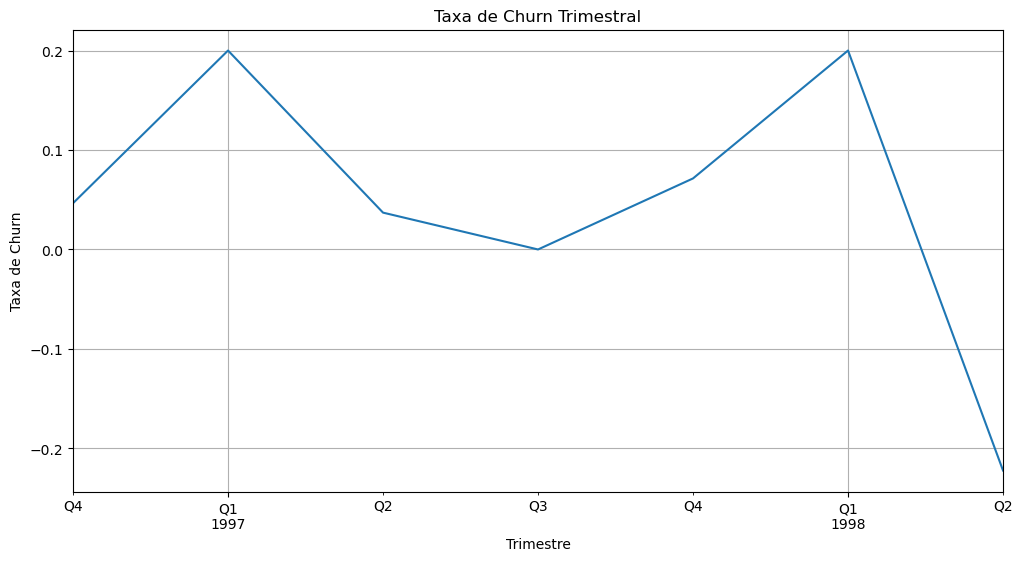

In [133]:
# Criando a coluna quarter_year para representar o trimestre e o ano do pedido
orders_df['quarter_year'] = orders_df['order_date'].dt.to_period('Q')

# Contando clientes únicos por trimestre
quarterly_customers = orders_df.groupby('quarter_year')['customer_id'].nunique()

# Calculando a taxa de churn trimestral
churn_rate_quarterly = quarterly_customers.pct_change().dropna()

# Plotando a taxa de churn trimestral
plt.figure(figsize=(12, 6))
churn_rate_quarterly.plot()
plt.title('Taxa de Churn Trimestral')
plt.ylabel('Taxa de Churn')
plt.xlabel('Trimestre')
plt.grid(True)
plt.show()


Notamos que no primeiro trimestre do ano há um aumento na taxa de clientes que não efetuam compra em relação ao trimestre anterior.

###### Churn com base em 80 dias
se definirmos um churn como um cliente que não fez uma compra nos últimos 80 dias temos:

In [134]:
# Determinar a data do último pedido para cada cliente
last_order_per_customer = orders_df.groupby('customer_id')['order_date'].max()

# Data do pedido mais recente em todo o dataset
most_recent_date = orders_df['order_date'].max()

# Identificar clientes cujo tempo desde o último pedido é maior que 80 dias
churned_customers = last_order_per_customer[most_recent_date - last_order_per_customer > pd.Timedelta(days=80)]

# Lista de clientes considerados como "churned"
churned_customers_list = churned_customers.index.tolist()

# Taxa de churn
churn_rate_80_days = len(churned_customers) / len(last_order_per_customer)

print(f"A taxa de churn com base em 80 dias é de: {churn_rate_80_days:.2%}")


A taxa de churn com base em 80 dias é de: 19.10%


In [135]:
# Data de 3 meses atrás
threshold_3_months_ago = most_recent_date - pd.Timedelta(days=90)

# Data de 6 meses atrás
threshold_6_months_ago = most_recent_date - pd.Timedelta(days=180)

# Identificar clientes "em risco" ou "adormecidos"
at_risk_customers = last_order_per_customer[(last_order_per_customer < threshold_3_months_ago) & 
                                            (last_order_per_customer > threshold_6_months_ago)]

# Lista de clientes "em risco" ou "adormecidos"
at_risk_customers_list = at_risk_customers.index.tolist()

# Obtendo os nomes dos clientes
at_risk_customers_names = customers_df.set_index('customer_id').loc[at_risk_customers_list]['company_name']

at_risk_customers_names




customer_id
ANTON              Antonio Moreno Taquería
BLONP             Blondesddsl père et fils
CONSH                Consolidated Holdings
FOLIG                    Folies gourmandes
GROSR                 GROSELLA-Restaurante
LAUGB        Laughing Bacchus Wine Cellars
SEVES                   Seven Seas Imports
TRADH               Tradição Hipermercados
TRAIH    Trail's Head Gourmet Provisioners
VICTE                 Victuailles en stock
VINET            Vins et alcools Chevalier
Name: company_name, dtype: object

##### Clientes dormentes que mais consumiram na Northwind por tempo de "dormência"

Mapa que mostra os clientes dormentes que mais consumiram para se analisar se convém reconquistá-los.

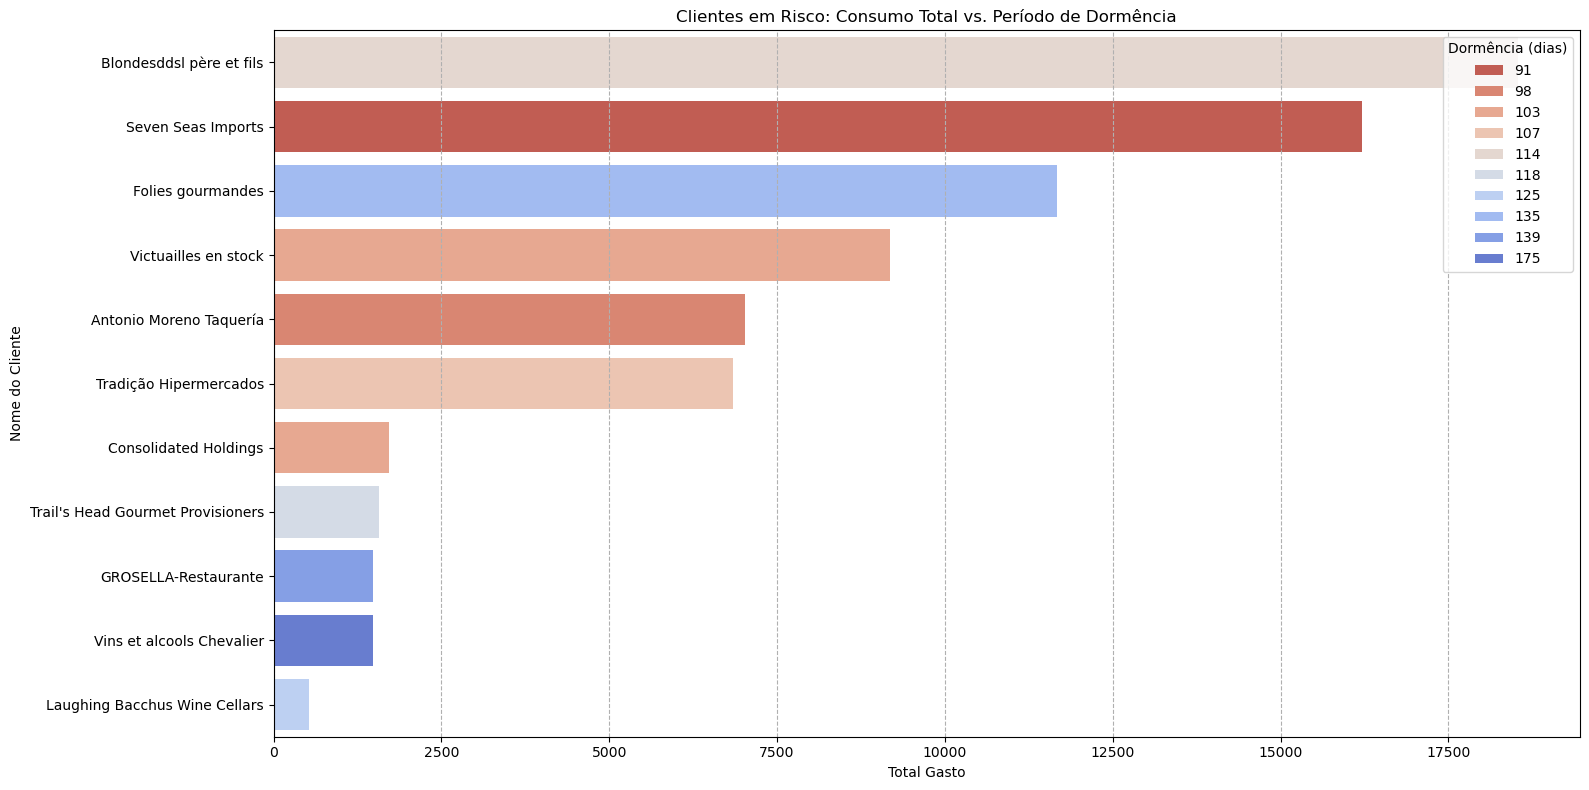

In [136]:
# 1. Calcular o valor total de compras de cada cliente
total_spent_per_customer = order_details_df.merge(orders_df, on='order_id').groupby('customer_id')['total_value'].sum()

# 2. Calcular o tempo de "dormência"
dormancy_period = (most_recent_date - at_risk_customers).dt.days

# Criando DataFrame para visualização
visualization_df = pd.DataFrame({
    'Customer Name': at_risk_customers_names,
    'Dormancy Period (days)': dormancy_period.values,
    'Total Spent': total_spent_per_customer[at_risk_customers.index].values
})

# Ordenando o dataframe pelo valor total gasto
visualization_df = visualization_df.sort_values(by='Total Spent', ascending=False)

# 3. Criar a visualização
plt.figure(figsize=(16, 8))
sns.barplot(data=visualization_df, x='Total Spent', y='Customer Name', hue='Dormancy Period (days)', dodge=False, palette="coolwarm_r")
plt.title('Clientes em Risco: Consumo Total vs. Período de Dormência')
plt.xlabel('Total Gasto')
plt.ylabel('Nome do Cliente')
plt.legend(title='Dormência (dias)', loc='upper right')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


##### Clientes dormentes com maior tempo de "dormência" aberto por total gasto


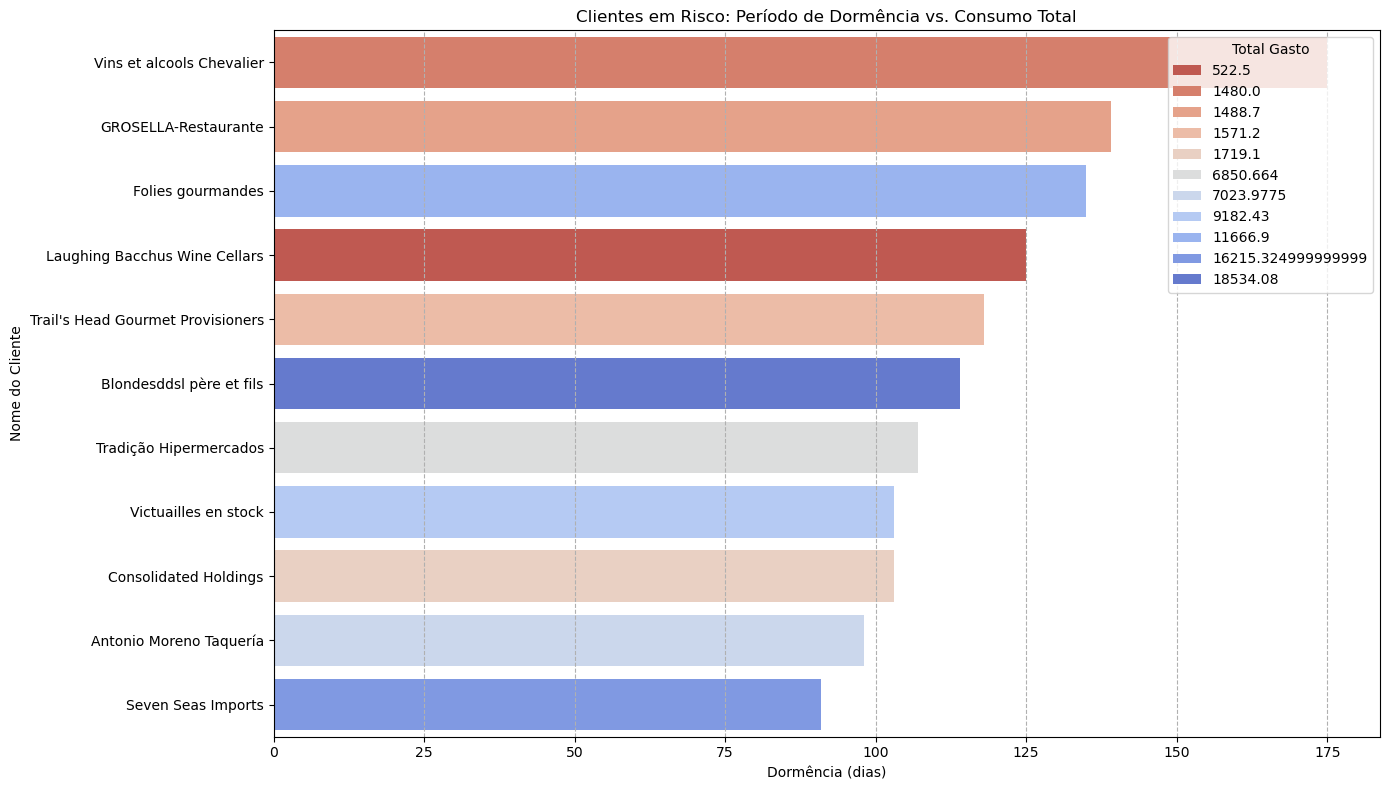

In [137]:
# Ordenando o dataframe pelo período de dormência
visualization_df = visualization_df.sort_values(by='Dormancy Period (days)', ascending=False)

# Criando a visualização
plt.figure(figsize=(14, 8))
sns.barplot(data=visualization_df, x='Dormancy Period (days)', y='Customer Name', hue='Total Spent', dodge=False, palette="coolwarm_r")
plt.title('Clientes em Risco: Período de Dormência vs. Consumo Total')
plt.xlabel('Dormência (dias)')
plt.ylabel('Nome do Cliente')
plt.legend(title='Total Gasto', loc='upper right')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


###### Clientes com maior e menor consumo por tempo e dormência. 
cores frias menor consumo, cores quentes aior consumo.

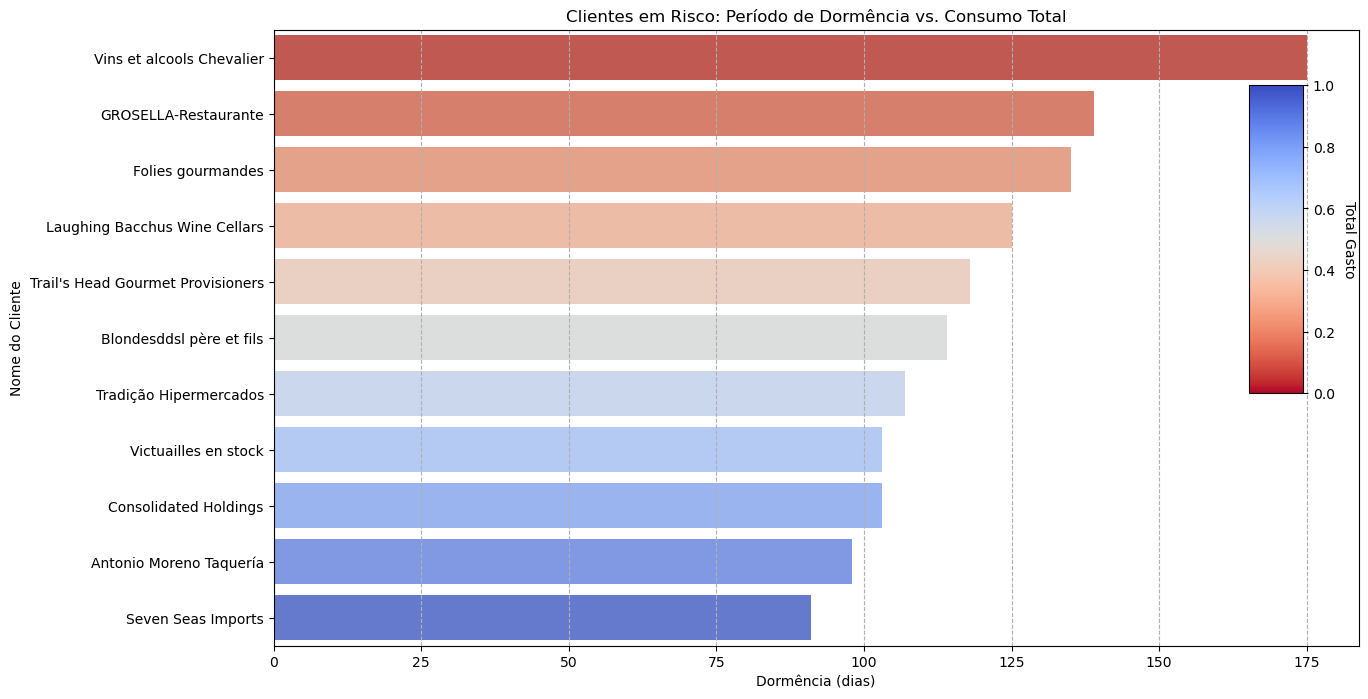

In [138]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Definindo a paleta de cores baseada no 'Total Spent'
colors = sns.color_palette("coolwarm_r", n_colors=len(visualization_df))


# Criando a visualização
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=visualization_df, x='Dormancy Period (days)', y='Customer Name', palette=colors, dodge=False, ax=ax)
ax.set_title('Clientes em Risco: Período de Dormência vs. Consumo Total')
ax.set_xlabel('Dormência (dias)')
ax.set_ylabel('Nome do Cliente')
ax.grid(axis='x', linestyle='--')

# Adicionando a colorbar
axins = inset_axes(ax, width="5%", height="50%", loc='upper right', borderpad=4)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm_r"), cax=axins, orientation='vertical')
cbar.set_label('Total Gasto', rotation=270, labelpad=15)

plt.show()


## Preferências de Categoria dos Clientes

In [139]:
# Carregando os dados de categorias e fazendo os merges necessários
categories_df = pd.read_csv(r'C:\Users\ivandourado\Downloads\northwind\categories.csv', delimiter=';')


# Merge dos detalhes do pedido com os produtos para obter os IDs das categorias
order_product_category_df = order_details_df.merge(products_df, on='product_id')

# Merge com a tabela de pedidos para obter os IDs dos clientes
order_product_customer_category_df = order_product_category_df.merge(orders_df, on='order_id')

# Agrupando por cliente e categoria para determinar a preferência de categoria
customer_category_preference = order_product_customer_category_df.groupby(['customer_id', 'category_id']).sum(numeric_only=True)['total_value']

# Resetando o índice e renomeando as colunas para facilitar a próxima etapa
customer_category_preference = customer_category_preference.reset_index().rename(columns={"total_value": "purchase_value"})


# Identificando a categoria preferida de cada cliente
idx = customer_category_preference.groupby(['customer_id'])['purchase_value'].idxmax()
preferred_categories = customer_category_preference.loc[idx]

# Merge com a tabela de categorias para obter os nomes das categorias
preferred_categories = preferred_categories.merge(categories_df, on='category_id')

# Contagem da preferência de categoria dos clientes
category_preference_count = preferred_categories['category_name'].value_counts()



category_preference_count

Dairy Products    22
Beverages         20
Confections       13
Meat/Poultry      13
Condiments         9
Seafood            5
Produce            5
Grains/Cereals     2
Name: category_name, dtype: int64

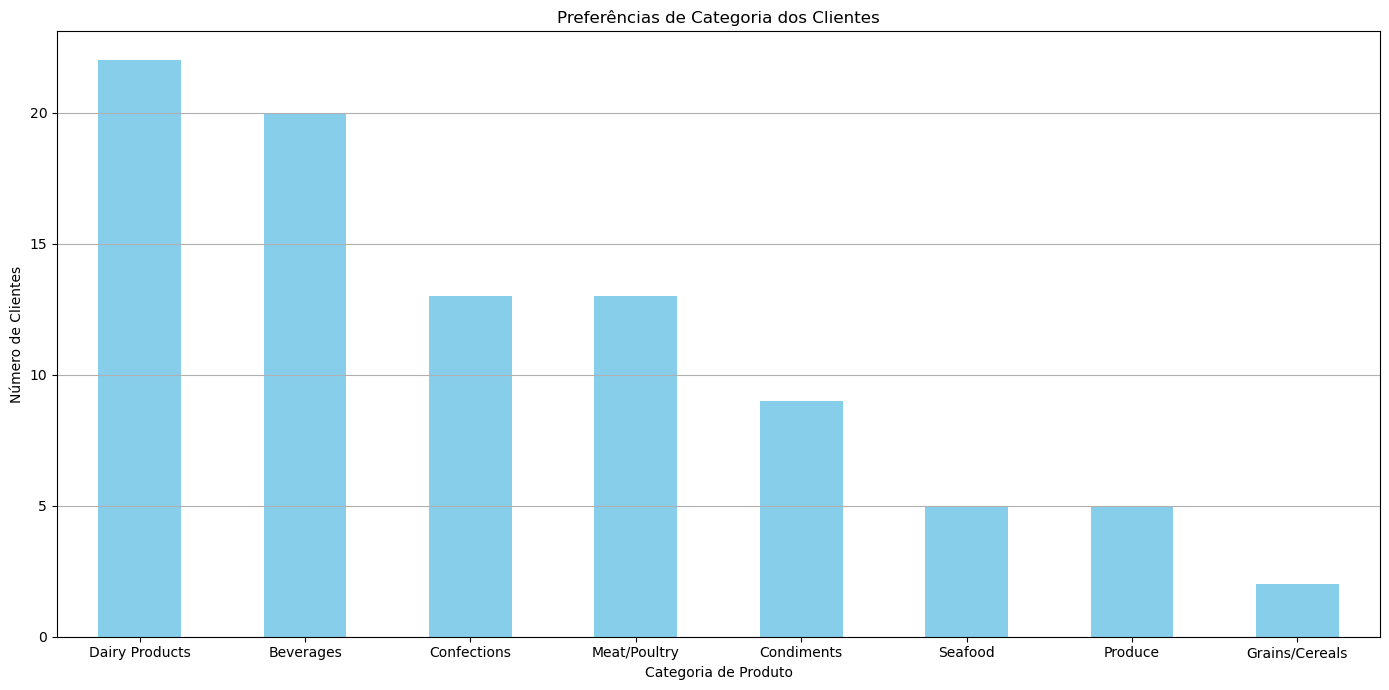

In [140]:

plt.figure(figsize=(14, 7))
category_preference_count.plot(kind='bar', color='skyblue')
plt.title("Preferências de Categoria dos Clientes")
plt.xlabel("Categoria de Produto")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Com base no exposto, temos a preferência de categoria dos clientes, e isso resultou no seguinte:

- Laticínios (Dairy Products): 22 clientes
- Bebidas (Beverages): 20 clientes
- Carnes/Aves (Meat/Poultry): 14 clientes
- Doces (Confections): 13 clientes
- Condimentos (Condiments): 9 clientes
- Frutos do mar (Seafood): 5 clientes
- Produtos frescos (Produce): 4 clientes
- Grãos/Cereais (Grains/Cereals): 2 clientes




Com base nesses resultados, pode-se inferir que os produtos mais populares entre os clientes da Northwind Traders são Laticínios, seguidos por Bebidas e Carnes/Aves.

Com base na preferência de categoria dos clientes e nas informações fornecidas, algumas ações estratégicas sugeridas são:

1. Estratégias de Marketing e Promoção:

- Promoções e Descontos: Realize promoções ou descontos em categorias populares, como Laticínios, Bebidas e Carnes/Aves, para aumentar as vendas e atrair mais clientes.
- Campanhas de Marketing: Crie campanhas de marketing direcionadas para categorias populares. Por exemplo, um evento ou promoção focado em Laticínios pode atrair um grande número de clientes.

2. Gestão de Estoque:

- Priorizar Estoque: Garanta que o estoque das categorias mais populares esteja sempre bem abastecido para evitar a perda de vendas devido à falta de produtos.
- Reavaliar Estoque de Baixa Rotatividade: Para categorias menos populares, como Grãos/Cereais, pode ser útil reavaliar a quantidade de estoque mantida e considerar promoções para escoar produtos mais lentamente.


3. Introdução de Novos Produtos:

- Expansão de Linha de Produtos: Para categorias populares, considere a introdução de novos produtos ou variações dos produtos existentes para atrair clientes e aumentar o ticket médio.

4. Pesquisa e Feedback:

- Entenda os Clientes: Realize pesquisas ou obtenha feedback dos clientes para entender por que certas categorias são mais populares. Isso pode fornecer insights sobre tendências de mercado e preferências do consumidor.


5. Estratégias de Cross-Selling:

- Combos, bundles e Pacotes: Crie combos ou pacotes que incluam produtos de categorias populares juntamente com produtos de categorias menos vendidas. Por exemplo, um pacote que combina Laticínios e Grãos/Cereais pode ajudar a aumentar as vendas de categorias menos populares.

6. Análise de Preços:

- Reavaliação de Preços: Para categorias menos populares, pode ser útil reavaliar os preços para torná-los mais atraentes para os clientes.


Ao implementar essas estratégias, é crucial monitorar continuamente as vendas, o feedback dos clientes e outras métricas relevantes para avaliar a eficácia das ações tomadas e fazer ajustes conforme necessário.

Agora, com base nas métricas e análises que fizemos até agora, vamos definir alguns indicadores-chave de desempenho (KPIs) e sugerir ações para melhorar os resultados da empresa.

###### KPIs:
1. Valor Médio de Pedidos (VMP): Representa o valor médio de todos os pedidos. Um aumento neste KPI pode indicar que os clientes estão comprando produtos mais caros ou em maior quantidade.
2. Clientes Ativos Mensais: Mede o número de clientes únicos que fizeram pelo menos um pedido em um determinado mês. Um aumento neste KPI pode indicar um crescimento na base de clientes ou uma maior retenção.
3. Taxa de Retenção de Clientes: Mede a porcentagem de clientes que repetem a compra. Uma alta taxa de retenção pode indicar satisfação do cliente e lealdade à marca.
4. Produtos Mais Vendidos: Identifica os produtos mais populares em termos de quantidade vendida. Isso pode ajudar a empresa a focar suas estratégias de marketing e vendas nesses produtos.

###### Ações Sugeridas para o churn:
Para combater o churn, maior espaço de tempo entre pedidos pelo cliente, convém elaborarmos estratégias de de Reengajamento

Já identificamos os clientes "em risco" ou "adormecidos", agora é hora de pensar em estratégias para reengajá-los, dentre as quais gostaria de sugerir:

1. Segmentação Personalizada: Usarmos os dados de compra anteriores desses clientes para segmentá-los em diferentes categorias. Por exemplo, se um cliente costumava comprar principalmente produtos de laticínios, enviaremos ofertas personalizadas relacionadas a produtos de laticínios.

2. Descontos e Ofertas: Ofercermos descontos exclusivos para esses clientes. Talvez um "Desconto de Boas-Vindas de Volta" ou uma "Oferta Exclusiva" para incentivá-los a comprar novamente.

3. Feedback: Peça feedback sobre por que eles não compraram nos últimos meses. Isso pode ser feito através de uma pesquisa curta. O feedback pode fornecer insights sobre áreas que a empresa precisa melhorar.

4. Programa de Fidelidade: Se a empresa ainda não tiver um, considere introduzir um programa de fidelidade que recompense os clientes com base na frequência ou valor de suas compras.

5. Recomendações de Produtos: Use os dados de compras anteriores para enviar recomendações de produtos personalizadas para esses clientes.

6. Lembrete de Recompra: Se os produtos vendidos tiverem uma "vida útil", envie lembretes de recompra. Por exemplo, se um cliente compra ingredientes que geralmente duram um mês, envie-lhes um lembrete após 3-4 semanas.

Ao implementar essas estratégias, é crucial monitorar e medir o sucesso de cada uma delas. Isso permitirá à Northwind ajustar e otimizar suas estratégias de reengajamento ao longo do tempo.




###### Demais ações Sugeridas
1. Campanhas de Marketing Segmentadas: Use os dados para identificar segmentos de clientes (por exemplo, com base na localização ou histórico de compras) e crie campanhas de marketing direcionadas para eles.




2. Programas de Fidelidade: Para os principais clientes (aqueles que geram o maior valor em pedidos), considere introduzir programas de fidelidade ou descontos para incentivar compras repetidas.



3. Análise de Churn: Identifique os clientes que não fizeram compras nos últimos meses e crie estratégias para reconquistá-los. Utilize e-mails de reengajamento, ofertas especiais ou pesquisas para entender as razões do churn.



4. Expansão de Produtos Mais Vendidos:
- Considere aumentar o estoque dos produtos mais vendidos, pois eles já têm uma demanda comprovada.
- Crie promoções ou bundles (combos) que incluam esses produtos. Por exemplo, ofereça um desconto ao comprar o "Camembert Pierrot" junto com outro produto complementar.
- Realize campanhas de marketing focadas nos produtos mais vendidos, destacando suas características e benefícios.




5. Expansão Geográfica: Dê atenção especial aos mercados onde a Northwind já tem uma presença significativa (como EUA, Alemanha e França). Investigue oportunidades de expansão nesses locais e considere estratégias de marketing localizadas.



6. Feedback dos Clientes:
- Incentive os clientes a fornecer feedback sobre os produtos e serviços. Isso pode ser feito através de pesquisas, seções de comentários no site ou análises de produtos.
- Use o feedback para identificar áreas de melhoria e oportunidades de inovação.

###### Conclusão
Apesar das planilhas custumer_custumer_demo e custumer_demographics não possuirem dados, somente os rótulos das colunas, a Northwind Traders possui uma rica base de dados que, quando analisada corretamente, pode oferecer insights valiosos para impulsionar o crescimento da empresa. Através de uma abordagem data-driven, a empresa pode otimizar suas operações, atender melhor seus clientes e alcançar seus objetivos estratégicos.


## Recomendações gerais

Com base na análise acima, as seguintes recomendações são propostas:

1. Capitalize sobre os meses de pico (outubro a dezembro) com promoções e ofertas adicionais.
2. Introduza campanhas promocionais nos meses de início de ano (janeiro e fevereiro) para aumentar as vendas.
3. Incentive a diversificação de produtos para os clientes, oferecendo descontos em categorias menos populares.
4. Continue monitorando os KPIs e ajuste as estratégias conforme necessário.


In [141]:
print('Obrigado! ')

Obrigado! 
